### Case Study #1

priyankamohanrao.nigade@pace.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost


In [2]:
# Loading the data into Data Frame

loan_df = pd.read_csv('loans_full_schema.csv')

print(loan_df.shape)
loan_df.head()

(10000, 55)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


There are total 10000 instances(rows) and  55 attributes (columns) in the dataset.

#### Describe the dataset

<li> There are 55 columns and 10000 rows in the given dataset
<li> Most of the column values are numeric
<li> state, homeownership, application_type, verified_income, loan_status, initial_listing_status, disbursement_method,grade,loan_purpose, issue_month are categorical columns.

*** Column info***
<li>emp_title - 
Job title.

<li>emp_length - 
Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.

<li>state - 
Two-letter state code.

<li>home_ownership - 
The ownership status of the applicant's residence.

<li>annual_income - 
Annual income.

<li>verified_income - 
Type of verification of the applicant's income.

<li>debt_to_income - 
Debt-to-income ratio.

<li>annual_income_joint - 
If this is a joint application, then the annual income of the two parties applying.

<li>verification_income_joint - 
Type of verification of the joint income.

<li>debt_to_income_joint - 
Debt-to-income ratio for the two parties.

<li>delinq_2y - 
Delinquencies on lines of credit in the last 2 years.

<li>months_since_last_delinq - 
Months since the last delinquency.

<li>earliest_credit_line - 
Year of the applicant's earliest line of credit

<li>inquiries_last_12m - 
Inquiries into the applicant's credit during the last 12 months.

<li>total_credit_lines - 
Total number of credit lines in this applicant's credit history.

<li>open_credit_lines - 
Number of currently open lines of credit.

<li>total_credit_limit - 
Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excludes a mortgage.

<li>total_credit_utilized - 
Total credit balance, excluding a mortgage.

<li>num_collections_last_12m - 
Number of collections in the last 12 months. This excludes medical collections.

<li>num_historical_failed_to_pay - 
The number of derogatory public records, which roughly means the number of times the applicant failed to pay.

<li>months_since_90d_late - 
Months since the last time the applicant was 90 days late on a payment.

<li>current_accounts_delinq - 
Number of accounts where the applicant is currently delinquent.

<li>total_collection_amount_ever - 
The total amount that the applicant has had against them in collections.

<li>current_installment_accounts - 
Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. A typical example might be a 36-month car loan.

<li>accounts_opened_24m - 
Number of new lines of credit opened in the last 24 months.

<li>months_since_last_credit_inquiry- 
Number of months since the last credit inquiry on this applicant.

<li>num_satisfactory_accounts - 
Number of satisfactory accounts.

<li>num_accounts_120d_past_due - 
Number of current accounts that are 120 days past due.

<li>num_accounts_30d_past_due - 
Number of current accounts that are 30 days past due.

<li>num_active_debit_accounts - 
Number of currently active bank cards.

<li>total_debit_limit - 
Total of all bank card limits.

<li>num_total_cc_accounts - 
Total number of credit card accounts in the applicant's history.

<li>num_open_cc_accounts - 
Total number of currently open credit card accounts.

<li>num_cc_carrying_balance - 
Number of credit cards that are carrying a balance.

<li>num_mort_accounts - 
Number of mortgage accounts.

<li>account_never_delinq_percent - 
Percent of all lines of credit where the applicant was never delinquent.

<li>tax_liens - 
a numeric vector

<li>public_record_bankrupt - 
Number of bankruptcies listed in the public record for this applicant.

<li>loan_purpose - 
The category for the purpose of the loan.

<li>application_type - 
The type of application: either individual or joint.

<li>loan_amount - 
The amount of the loan the applicant received.

<li>term - 
The number of months of the loan the applicant received.

<li>interest_rate - 
Interest rate of the loan the applicant received.

<li>installment - 
Monthly payment for the loan the applicant received.

<li>grade - 
Grade associated with the loan.

<li>sub_grade - 
Detailed grade associated with the loan.

<li>issue_month - 
Month the loan was issued.

<li>loan_status - 
Status of the loan.

<li>initial_listing_status -
Initial listing status of the loan. (I think this has to do with whether the lender provided the entire loan or if the loan is across multiple lenders.)

<li>disbursement_method -
Dispersement method of the loan.

<li>balance - 
Current balance on the loan.

<li>paid_total - 
Total that has been paid on the loan by the applicant.

<li>paid_principal - 
The difference between the original loan amount and the current balance on the loan.

<li>paid_interest - 
The amount of interest paid so far by the applicant.

<li>paid_late_fees - 
Late fees paid by the applicant.

#### Any issues with Dataset

<li> Too many missing values

### Explorartory Data Analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

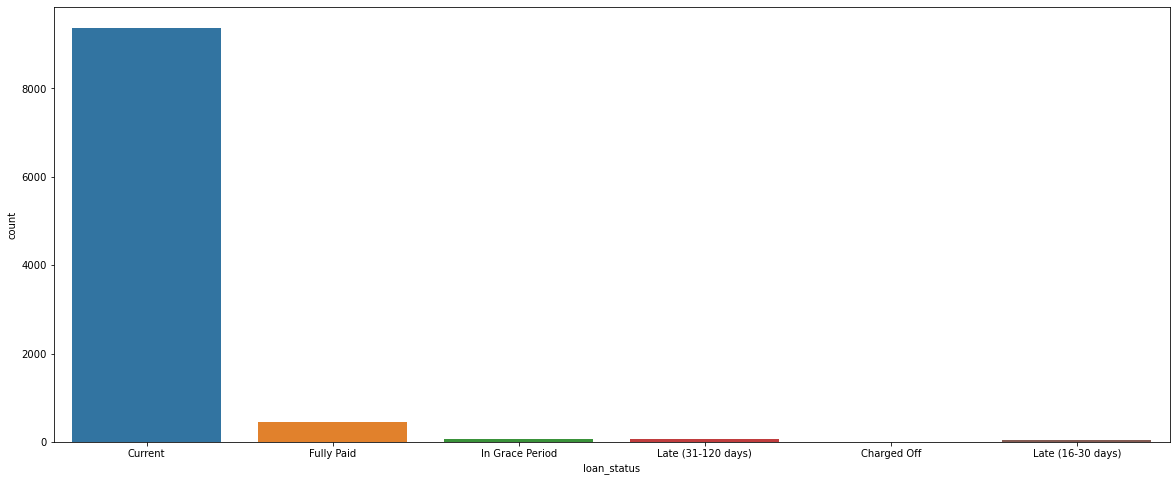

In [3]:
# Given - data set only represents loans actually made
# Lets plot counter plot to check the loan status count 

plt.figure(figsize=(20, 8))
sns.countplot(loan_df.loan_status)

From above plot we can see many loans are in current state

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_rate', ylabel='Density'>

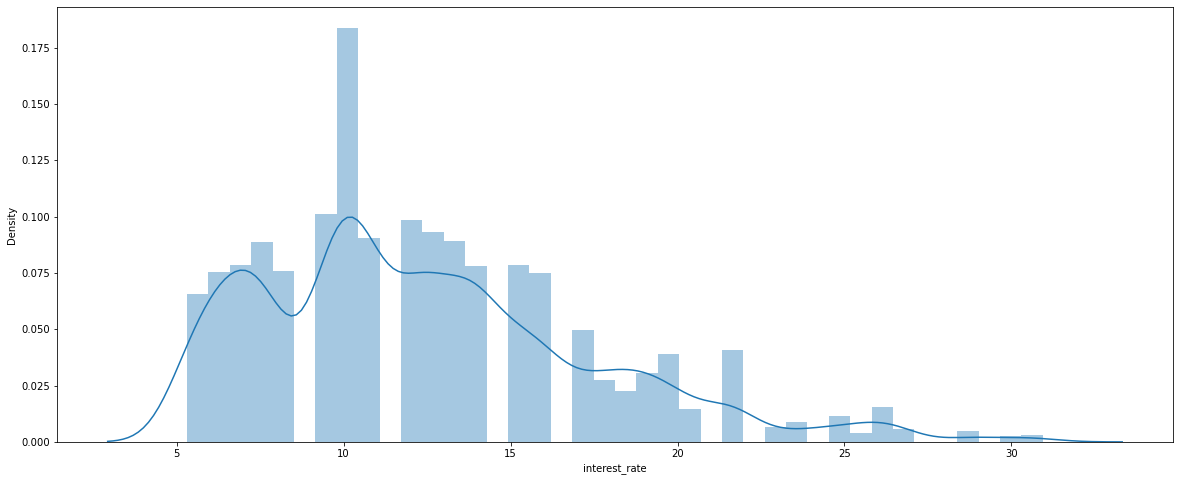

In [4]:

plt.figure(figsize=(20, 8))
sns.distplot(loan_df['interest_rate'],bins=40)

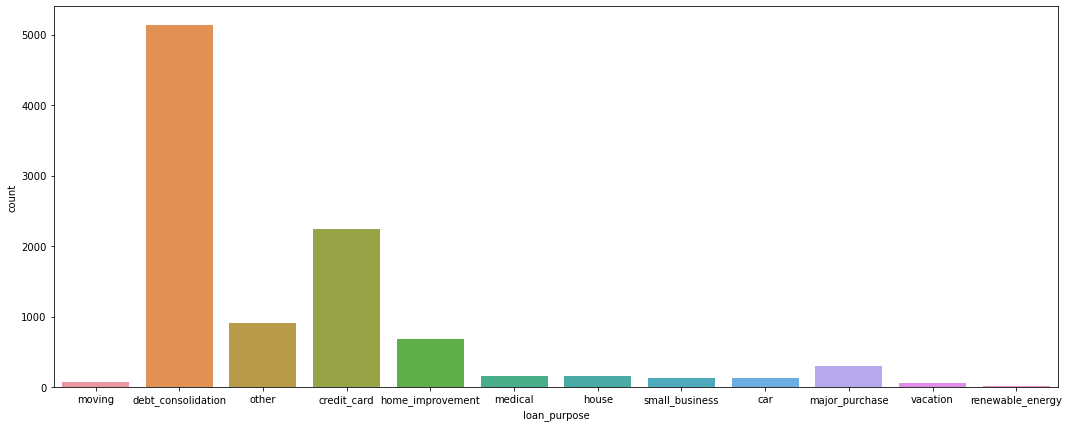

In [5]:
plt.figure(figsize=(18,7))
sns.countplot(x="loan_purpose", data=loan_df)
plt.show() 

Many loans are taken for the purpose of debt consolidation

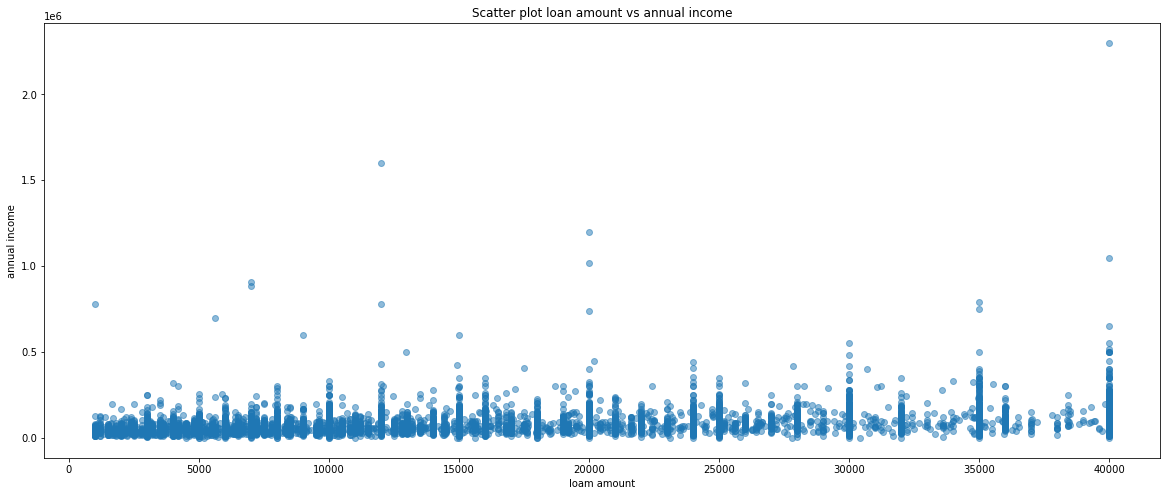

In [6]:
plt.figure(figsize=(20, 8))

# Plot
plt.scatter(loan_df['loan_amount'], loan_df['annual_income'], alpha=0.5)
plt.title('Scatter plot loan amount vs annual income')
plt.xlabel('loam amount')
plt.ylabel('annual income')
plt.show()

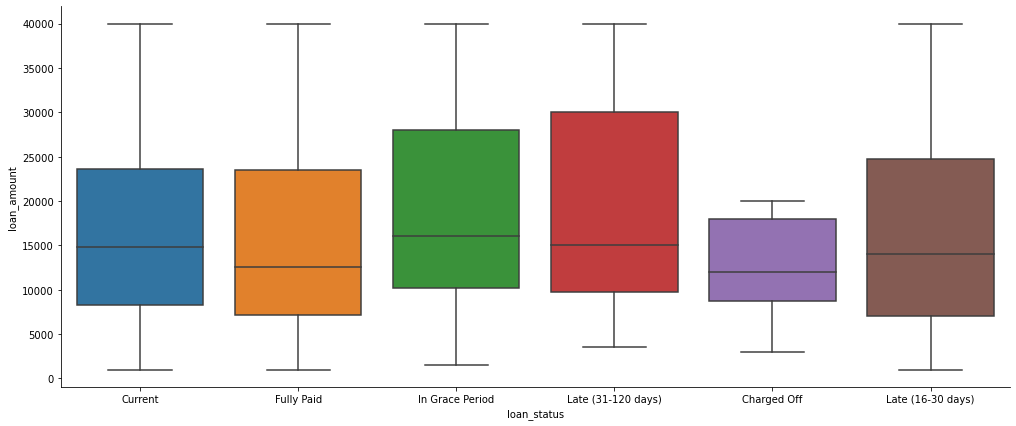

In [7]:
# check outliers using bocplot
plt.figure(figsize=(17, 7))
sns.boxplot(x='loan_status', y='loan_amount', data=loan_df)
sns.despine()

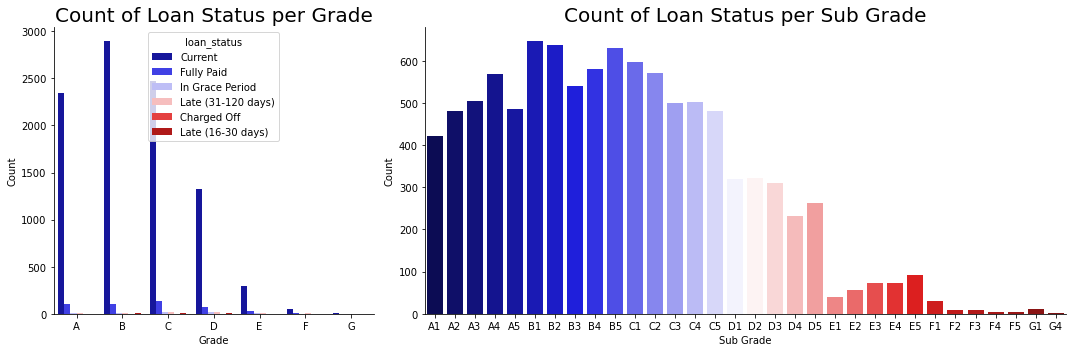

In [8]:
f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=loan_df, order=sorted(loan_df['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=loan_df, palette='seismic', order=sorted(loan_df['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()


In above plot the sub grades in blue are the good ones and in red are either late or charged off.

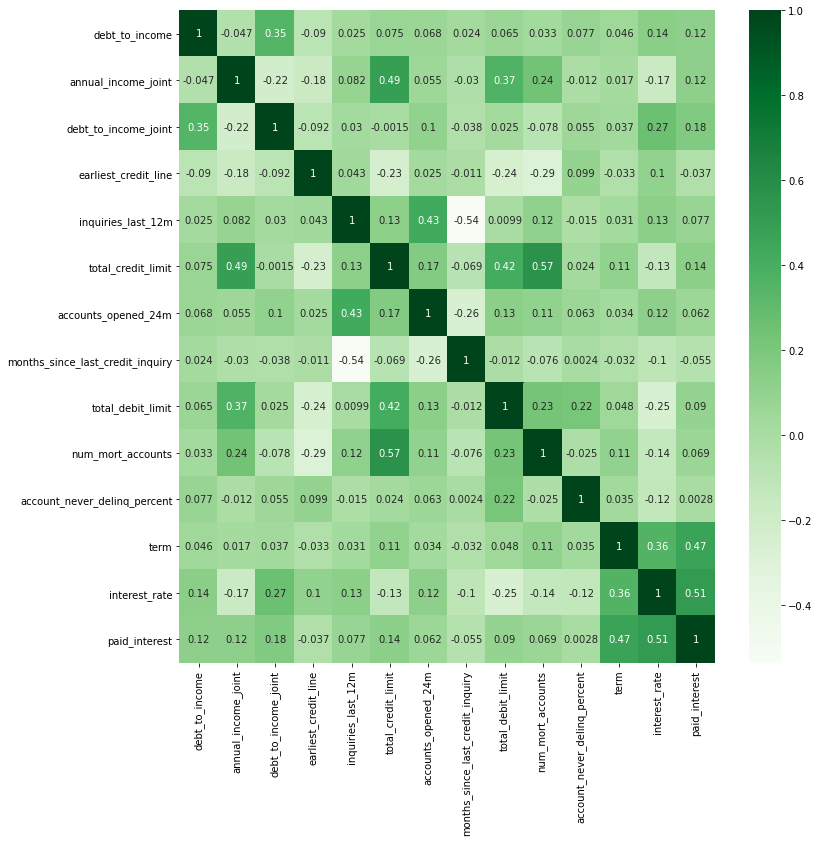

In [9]:
#correlation with respect to label 'interest_rate' and filtering out labels with less correlation as we have many columns

correlation = loan_df.corr(method='pearson', min_periods=1)
columns = correlation[abs(correlation['interest_rate']) > 0.1]['interest_rate']

column_list = columns.index

high_corr_df = pd.DataFrame(loan_df, columns = column_list)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(high_corr_df.corr(), annot=True, cmap=plt.cm.Greens)
plt.show()


In [10]:
# Check the column names, datatypes and the non-null value counts.

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

### Handle Missing Values

In [11]:
# Check count of null values in each column

loan_df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

#### Columns with many null values

<li> annual_income_joint            =     8505 
<li> verification_income_joint      =     8545
<li> debt_to_income_joint           =     8505
<li> months_since_last_delinq       =     5658
<li> months_since_90d_late          =     7715

In [12]:
# Create a new Dataframe data processing so that we won't make any changes in original Dataframe

loan_lend_club_df = loan_df.copy()


In [13]:
# Handling NA values with fillna(0) for columns - annual_income_joint, debt_to_income_joint, 
# months_since_last_delinq,months_since_90d_late

# loan_lend_club_df['annual_income_joint'] = loan_lend_club_df['annual_income_joint'].fillna(0)
# loan_lend_club_df['debt_to_income_joint'] = loan_lend_club_df['debt_to_income_joint'].fillna(0)
# loan_lend_club_df['months_since_last_delinq'] = loan_lend_club_df['months_since_last_delinq'].fillna(0)
# loan_lend_club_df['months_since_90d_late'] = loan_lend_club_df['months_since_90d_late'].fillna(0)


From above datset information we can see below column contains more than 50% (total records =10000) null values 
<li>verification_income_joint
<li>annual_income_joint
<li>debt_to_income_joint
<li>months_since_90d_late
<li>months_since_last_delinq
    
We cannot replace these null values, so lets delete these columns.    

In [14]:
loan_lend_club_df.drop(['verification_income_joint','annual_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late','months_since_last_delinq'],
                      axis=1, inplace = True)


In [15]:
# Handle Null values of emp_title column

emp_titles = list(loan_lend_club_df['emp_title'].unique())

len(emp_titles) # or loan_lend_club_df['emp_title'].nunique()


4742

In [16]:
# As there are too many categorical values which cannot be handled by dummy variables and 
# thus we cant use this column to build the model so lets drop it.

loan_lend_club_df.drop('emp_title', axis = 1, inplace = True)

In [17]:
# From correlation matrix we can see emp_length column has no impact on target (interest_rate) column, so we can drop it

loan_lend_club_df.drop('emp_length', axis = 1, inplace = True)


In [18]:
loan_lend_club_df.isna().sum()

state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limit                      0
num_total_cc_acc

Raplace null values of months_since_last_credit_inquiry and num_accounts_120d_past_due columns with mean value

In [19]:

loan_lend_club_df['months_since_last_credit_inquiry'].fillna(int(loan_lend_club_df['months_since_last_credit_inquiry'].mean()), inplace=True)


In [20]:

loan_lend_club_df['num_accounts_120d_past_due'].fillna(int(loan_lend_club_df['num_accounts_120d_past_due'].mean()), inplace=True)


In [21]:
# debt_to_income contains small number of null values lets drop null values
loan_lend_club_df.dropna()

,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,44,13,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,28,15,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,18,11,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,38,15,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [22]:
loan_lend_club_df.isna().sum()

state                                0
homeownership                        0
annual_income                        0
verified_income                      0
debt_to_income                      24
delinq_2y                            0
earliest_credit_line                 0
inquiries_last_12m                   0
total_credit_lines                   0
open_credit_lines                    0
total_credit_limit                   0
total_credit_utilized                0
num_collections_last_12m             0
num_historical_failed_to_pay         0
current_accounts_delinq              0
total_collection_amount_ever         0
current_installment_accounts         0
accounts_opened_24m                  0
months_since_last_credit_inquiry     0
num_satisfactory_accounts            0
num_accounts_120d_past_due           0
num_accounts_30d_past_due            0
num_active_debit_accounts            0
total_debit_limit                    0
num_total_cc_accounts                0
num_open_cc_accounts     

### Handling categorical values

<li> state	
<li> homeownership	
<li> application_type
<li> verified_income
<li> loan_status
<li> initial_listing_status	
<li> disbursement_method
<li> grade
<li> loan_purpose
<li> issue_month

In [23]:
# state and grade columns have high number of categorical values, so we can drop them

loan_lend_club_df.drop('state', axis = 1, inplace= True)
loan_lend_club_df.drop('sub_grade', axis = 1, inplace= True)

In [24]:
loan_lend_club_df['homeownership'].value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [25]:
# Replacing the categorical values 

loan_lend_club_df.replace({'homeownership': {"MORTGAGE": 0,'RENT':1, 'OWN':2}},inplace=True)

In [26]:
loan_lend_club_df['application_type'].value_counts()

individual    8505
joint         1495
Name: application_type, dtype: int64

In [27]:
# Replacing the categorical values 

loan_lend_club_df.replace({'application_type': {"individual": 0,'joint':1}},inplace=True)

In [28]:
loan_lend_club_df['verified_income'].value_counts()

Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64

In [29]:
# Replacing the categorical values 

loan_lend_club_df.replace({'verified_income': {"Not Verified": 0,'Verified':1, 'Source Verified':2}},inplace=True)

In [30]:
loan_lend_club_df['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [31]:
# Replacing the categorical values 

loan_lend_club_df.replace({'loan_status': {"Current": 0,'Fully Paid':1, 'In Grace Period':2, 'Late (31-120 days)':3, 
                                          'Late (16-30 days)':4, 'Charged Off': 5}},inplace=True)

In [32]:
loan_lend_club_df['initial_listing_status'].value_counts()

whole         8206
fractional    1794
Name: initial_listing_status, dtype: int64

In [33]:
# Replacing the categorical values 

loan_lend_club_df.replace({'initial_listing_status': {"whole": 0,'fractional':1}},inplace=True)

In [34]:
loan_lend_club_df['disbursement_method'].value_counts()

Cash         9284
DirectPay     716
Name: disbursement_method, dtype: int64

In [35]:
# Replacing the categorical values 

loan_lend_club_df.replace({'disbursement_method': {"Cash": 0,'DirectPay':1}},inplace=True)

In [36]:
loan_lend_club_df['grade'].value_counts()

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

In [37]:
# Replacing the categorical values 

loan_lend_club_df.replace({'grade': {"A": 0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}},inplace=True)

In [38]:
loan_lend_club_df['loan_purpose'].value_counts()

debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680
major_purchase         303
medical                162
house                  151
car                    131
small_business         125
moving                  69
vacation                62
renewable_energy        10
Name: loan_purpose, dtype: int64

In [39]:
# Replacing the categorical values 

loan_lend_club_df.replace({'loan_purpose': {"debt_consolidation": 0,'credit_card':1,'other':2,'home_improvement':3,
                                            'major_purchase':4,'medical':5,'house':6,'car':7,'small_business':8,'moving':9,
                                           'vacation':10,'renewable_energy':11}},inplace=True)


In [40]:
loan_lend_club_df.drop('issue_month', axis=1, inplace = True)

In [41]:
# The debt to income has very less null values.
loan_lend_club_df = loan_lend_club_df.dropna() 

In [42]:
# Final Dataset

loan_lend_club_df

,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,installment,grade,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,0,90000.0,1,18.01,0,2001,6,28,10,70795,...,652.53,2,0,0,0,27015.86,1999.33,984.14,1015.19,0.0
1,1,40000.0,0,5.04,0,1996,1,30,14,28800,...,167.54,2,0,0,0,4651.37,499.12,348.63,150.49,0.0
2,1,40000.0,2,21.15,0,2006,4,31,10,24193,...,71.40,3,0,1,0,1824.63,281.80,175.37,106.43,0.0
3,1,30000.0,0,10.16,0,2007,0,4,4,25400,...,664.19,0,0,0,0,18853.26,3312.89,2746.74,566.15,0.0
4,1,35000.0,1,57.96,0,2008,7,22,16,69839,...,786.87,2,0,0,0,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,108000.0,2,22.28,0,2008,5,44,13,199195,...,744.90,0,0,0,0,21586.34,2969.80,2413.66,556.14,0.0
9996,0,121000.0,1,32.38,4,1994,1,28,15,382061,...,366.72,3,0,0,0,9147.44,1456.31,852.56,603.75,0.0
9997,0,67000.0,1,45.26,2,2004,0,18,11,346402,...,1175.10,4,0,1,0,27617.65,4620.80,2382.35,2238.45,0.0
9998,0,80000.0,2,11.99,0,1999,1,38,15,294475,...,722.76,0,0,0,0,21518.12,2873.31,2481.88,391.43,0.0


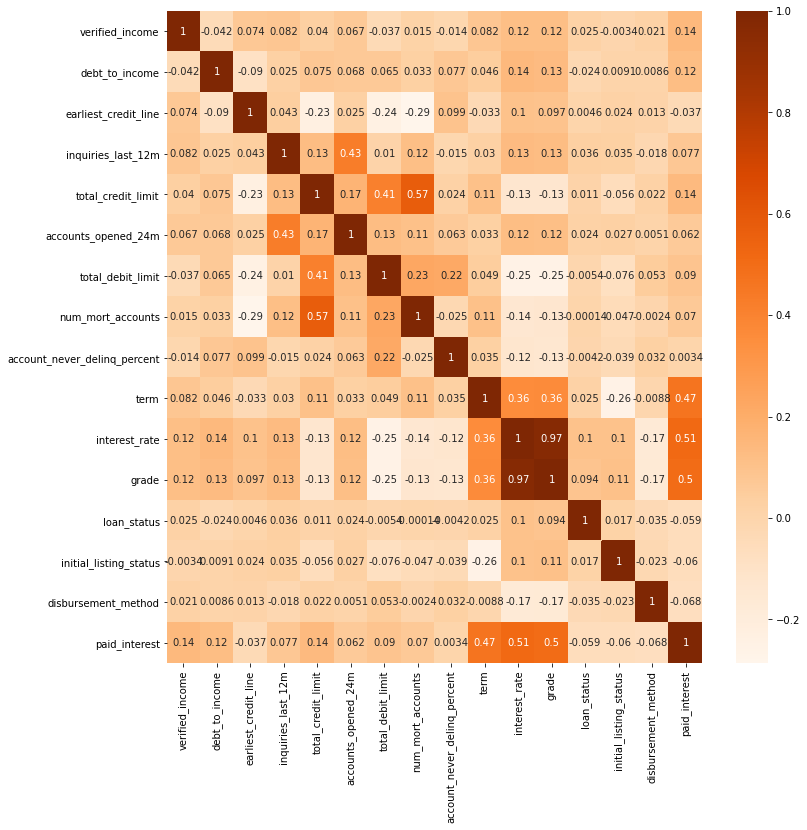

In [43]:
#correlation with respect to label 'interest_rate' and filtering out labels with less correlation as we have many columns

correlation = loan_lend_club_df.corr(method='pearson', min_periods=1)
columns = correlation[abs(correlation['interest_rate']) > 0.1]['interest_rate']

column_list = columns.index

high_corr_df = pd.DataFrame(loan_lend_club_df, columns = column_list)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(high_corr_df.corr(), annot=True, cmap=plt.cm.Oranges)
plt.show()


In [44]:
corr = loan_lend_club_df.corr()['interest_rate'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 loan_status                   0.104148
verified_income               0.119034
accounts_opened_24m           0.121271
inquiries_last_12m            0.131170
debt_to_income                0.141653
term                          0.358121
paid_interest                 0.514658
grade                         0.969352
interest_rate                 1.000000
num_accounts_120d_past_due         NaN
Name: interest_rate, dtype: float64

Most Negative Correlations:
 total_debit_limit                  -0.253867
disbursement_method                -0.168476
num_mort_accounts                  -0.137727
total_credit_limit                 -0.129734
account_never_delinq_percent       -0.124690
annual_income                      -0.098704
months_since_last_credit_inquiry   -0.092237
num_total_cc_accounts              -0.070787
total_credit_lines                 -0.043760
loan_purpose                       -0.043007
Name: interest_rate, dtype: float64


## Applying  Model

#### Divide Dataset into train and test dataset (70%:30%) ration

In [45]:
label = loan_lend_club_df['interest_rate'] # interest_rate is our target column
features_col = loan_lend_club_df.drop(['interest_rate'], axis = 1) 

# Dividing the dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(features_col, label, test_size = 0.3, random_state = 40)


In [46]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):

    r_squared = r2_score(y_test, y_pred)
    print('R Squared:', round(r_squared, 2))
    
    mse =mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', round(mse, 2))
 
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', round(rmse,2))
    
    mape = calculate_mape(y_test, y_pred)
    #print the MAPE value
    print('The Mean Absolute Percentage Error (MAPE) value: ', round(mape,2))
    
     # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print(f'Accuracy: {round(accuracy, 2)} %')


In [47]:
# Function to calculate the Mean Absolute Percentage Error (MAPE) value
def calculate_mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

### Linear Regression

In [48]:
# Building Linear Regressor  model 
linear_regressor = LinearRegression()

# fit the model with data
linear_regressor.fit(X_train, y_train)

# Predict the Xtest data with Linear Regressor model 
y_pred = linear_regressor.predict(X_test)

In [49]:
score=linear_regressor.score(X_train, y_train)
print('Model score:', score)
 

Model score: 0.9485012406276551


In [50]:
evaluate_model(y_test, y_pred)

R Squared: 0.94
Mean Squared Error: 1.37
Root Mean Squared Error: 1.17
The Mean Absolute Percentage Error (MAPE) value:  8.15
Accuracy: 91.85 %


### Random Forest Regressor

In [51]:
# Building Random Forest Regressor  model 
rf_regressor = RandomForestRegressor()

# fit the model with data
rf_regressor.fit(X_train, y_train)

# Predict the Xtest data with Random Forest Regressor model 
y_pred = rf_regressor.predict(X_test)

In [52]:
score= rf_regressor.score(X_train, y_train)
print('Model score:', score)


Model score: 0.9956644301175112


In [53]:
evaluate_model(y_test, y_pred)

R Squared: 0.97
Mean Squared Error: 0.79
Root Mean Squared Error: 0.89
The Mean Absolute Percentage Error (MAPE) value:  6.24
Accuracy: 93.76 %


### XGBoost Regressor

In [54]:
# Building XGBoost model 
# The Extreme gradient boosting decision tree algorithm.
xcb_model = XGBRegressor()

# fit the model with data
xcb_model.fit(X_train, y_train)

# Predict the Xtest data with XGBoost regressor model 
y_pred = xcb_model.predict(X_test)

In [55]:
# After training the model, we'll check the model training score.

score = xcb_model.score(X_train, y_train)  
print("Model Training score: ", score)


Model Training score:  0.9971552305573596


In [56]:
evaluate_model(y_test, y_pred)

R Squared: 0.98
Mean Squared Error: 0.6
Root Mean Squared Error: 0.78
The Mean Absolute Percentage Error (MAPE) value:  4.68
Accuracy: 95.32 %


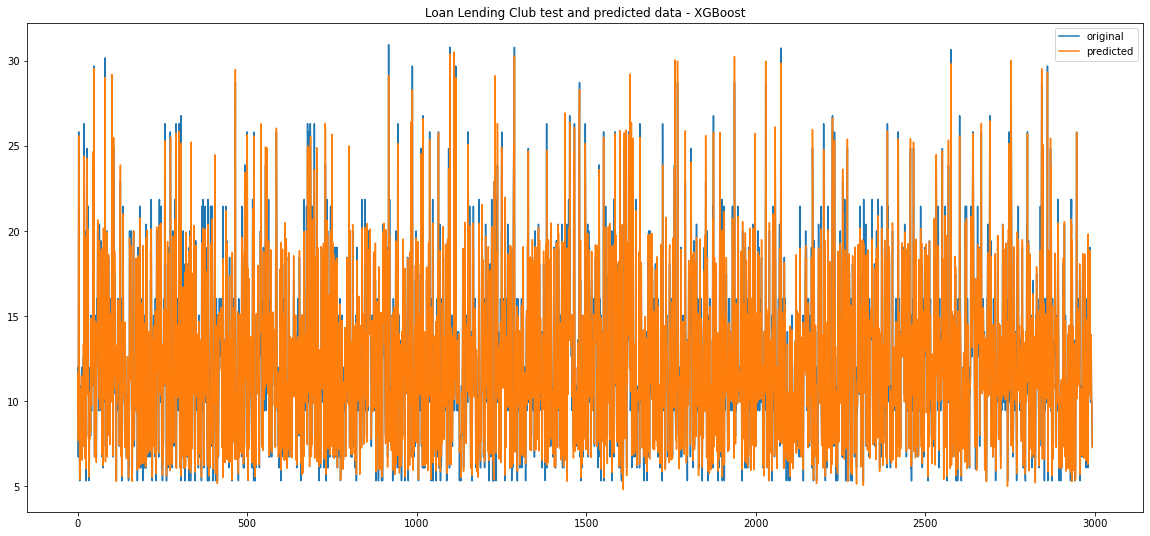

In [57]:
plt.figure(figsize=(20, 9))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Loan Lending Club test and predicted data - XGBoost")
plt.legend()
plt.show()

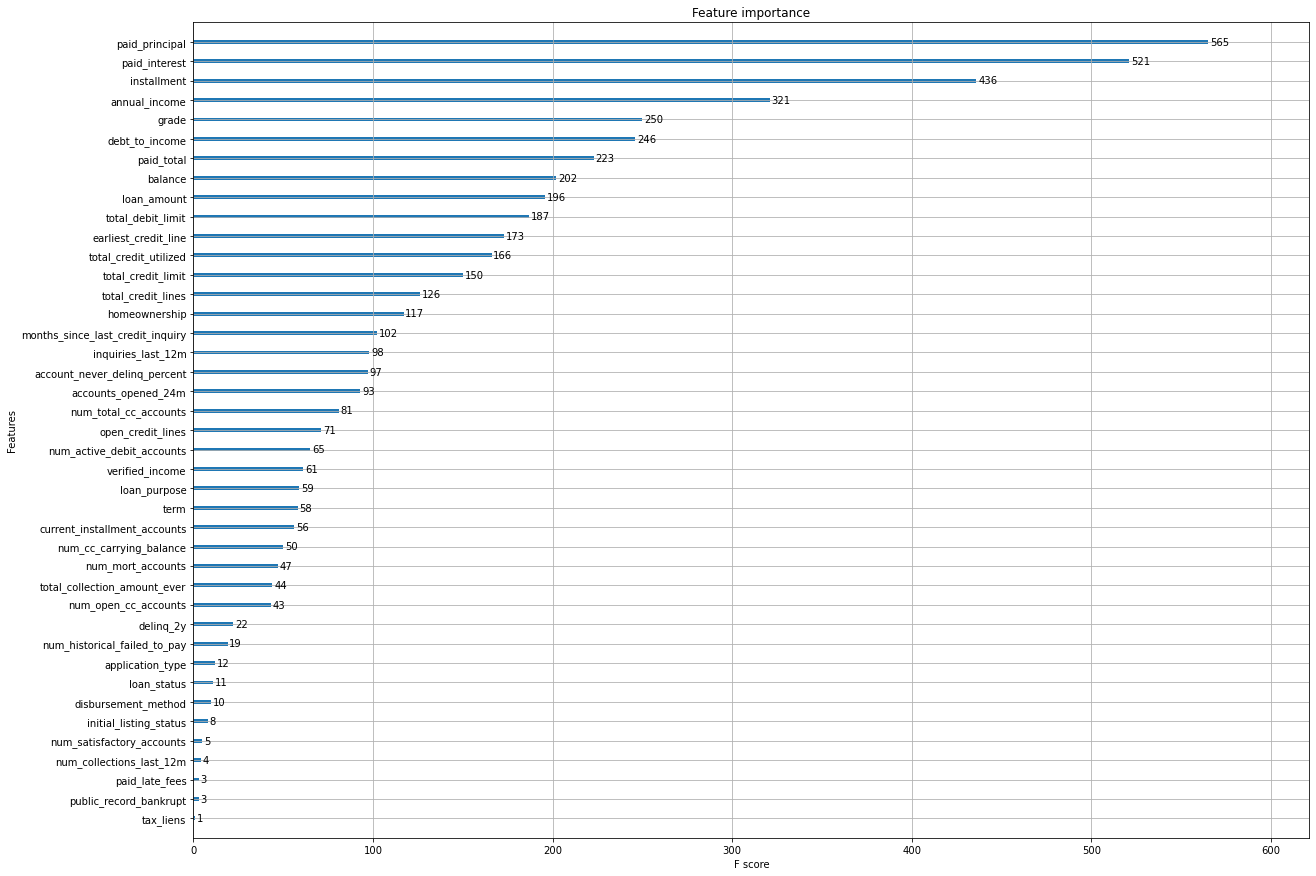

In [58]:
ax = xgboost.plot_importance(xcb_model, importance_type='weight')
fig = ax.figure
fig.set_size_inches(20, 15)


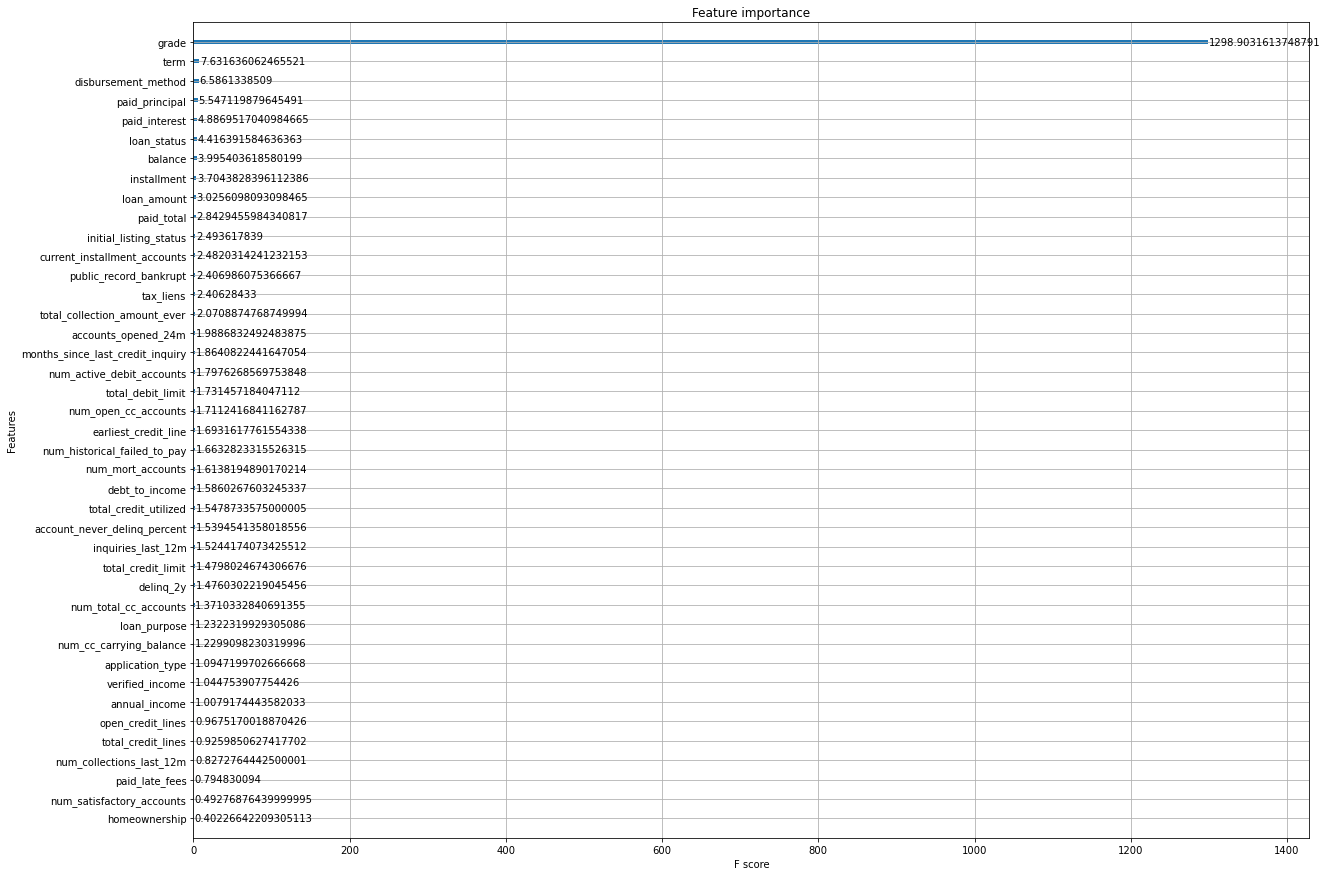

In [59]:
ax = xgboost.plot_importance(xcb_model, importance_type='gain')
fig = ax.figure
fig.set_size_inches(20, 15)

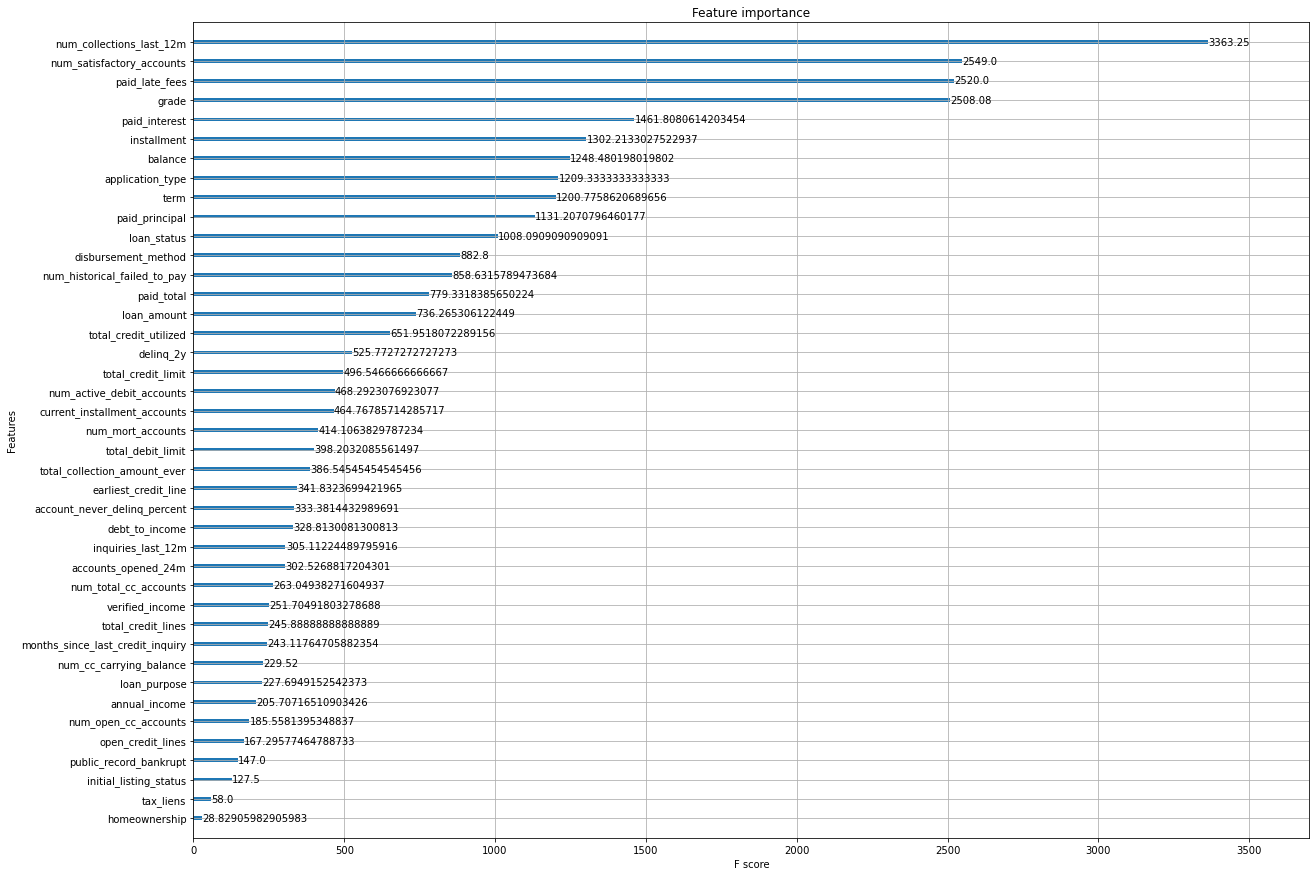

In [60]:
ax = xgboost.plot_importance(xcb_model, importance_type='cover')
fig = ax.figure
fig.set_size_inches(20, 15)

### Propose enhancements to the model

<li> We can tuned the hyper parameters of the model as below
<li> We can normalized the dataset values in the range (0-1) so all the values of dataset will fall in same unit

### Parameterised XGBoost

In [61]:
from scipy import stats

param_dist = {'n_estimators': stats.randint(550, 1200),
              'learning_rate': stats.uniform(0.01, 0.2),
              'subsample': stats.uniform(0.7, 0.3),
              'max_depth': [5, 6, 7],
              'colsample_bytree': stats.uniform(0.5, 0.5),
              'min_child_weight': [2, 3, 4, 5]
             }

xgbc = XGBRegressor(use_label_encoder=False)
parameterized_xgb = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=15,
    n_jobs = -1
)

parameterized_xgb.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd07a0222e0>,
                                        'learning_rate': <

In [62]:
pd.DataFrame(parameterized_xgb.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,38.299035,0.099262,0.016155,0.000988,0.958815,0.062829,6,5,707,0.950063,"{'colsample_bytree': 0.9588149489182812, 'lear...",0.974972,0.976463,0.976438,0.975957,0.000697,1
6,44.258819,0.074835,0.021814,0.004824,0.675258,0.128652,5,3,1107,0.948002,"{'colsample_bytree': 0.6752576922541306, 'lear...",0.974330,0.975209,0.975494,0.975011,0.000495,2
5,35.244265,0.528135,0.021482,0.004872,0.554723,0.103019,5,2,905,0.918494,"{'colsample_bytree': 0.554723324170915, 'learn...",0.973738,0.975731,0.975330,0.974933,0.000861,3
4,44.088669,0.410573,0.020230,0.000476,0.686393,0.162102,5,3,1103,0.983512,"{'colsample_bytree': 0.686393489163944, 'learn...",0.974652,0.974832,0.975222,0.974902,0.000238,4
0,30.896628,0.057273,0.017642,0.000825,0.924409,0.045779,5,2,749,0.977993,"{'colsample_bytree': 0.9244088486342894, 'lear...",0.973855,0.975101,0.975217,0.974724,0.000617,5
3,34.378015,0.253246,0.020338,0.004821,0.852958,0.164929,6,5,646,0.999563,"{'colsample_bytree': 0.8529583217453449, 'lear...",0.973481,0.975153,0.975244,0.974626,0.000810,6
7,36.576388,0.264684,0.015127,0.002375,0.847387,0.075207,6,2,638,0.7239,"{'colsample_bytree': 0.8473871030034215, 'lear...",0.973924,0.975297,0.974011,0.974411,0.000628,7
9,36.617031,0.383637,0.021345,0.004905,0.86463,0.166498,7,5,896,0.992382,"{'colsample_bytree': 0.8646300179236915, 'lear...",0.973121,0.974236,0.974902,0.974086,0.000735,8
8,34.371759,2.533959,0.025354,0.011160,0.528416,0.025666,5,5,1104,0.845059,"{'colsample_bytree': 0.5284156007060419, 'lear...",0.973905,0.973614,0.973460,0.973660,0.000185,9
1,28.061339,0.066811,0.017061,0.001339,0.512477,0.17446,6,5,573,0.77497,"{'colsample_bytree': 0.5124765161645372, 'lear...",0.970110,0.970882,0.970368,0.970453,0.000321,10


In [63]:
print(parameterized_xgb.best_params_)

{'colsample_bytree': 0.9588149489182812, 'learning_rate': 0.06282937065067472, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 707, 'subsample': 0.9500632274908789}


In [64]:
y_pred = parameterized_xgb.best_estimator_.predict(X_test)

In [65]:
evaluate_model(y_test, y_pred)

R Squared: 0.98
Mean Squared Error: 0.51
Root Mean Squared Error: 0.71
The Mean Absolute Percentage Error (MAPE) value:  4.25
Accuracy: 95.75 %


In [66]:
print("XGBoost Model score: ", parameterized_xgb.best_score_)

XGBoost Model score:  0.9759574570954793


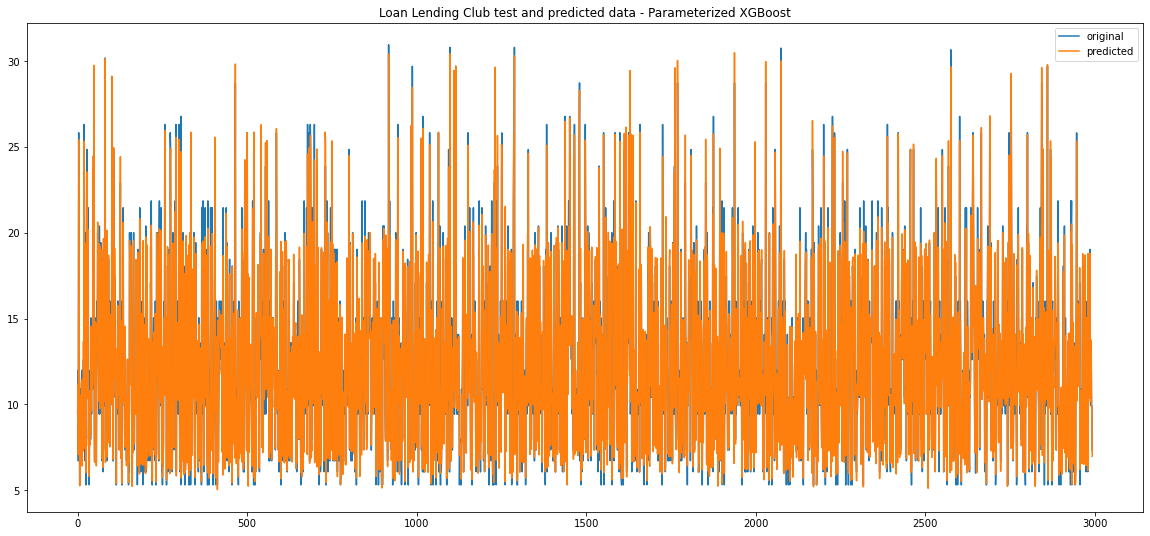

[CV] END colsample_bytree=0.9588149489182812, learning_rate=0.06282937065067472, max_depth=6, min_child_weight=5, n_estimators=707, subsample=0.9500632274908789; total time=  38.4s
[CV] END colsample_bytree=0.554723324170915, learning_rate=0.10301863215296711, max_depth=5, min_child_weight=2, n_estimators=905, subsample=0.9184944815166264; total time=  36.0s
[CV] END colsample_bytree=0.6752576922541306, learning_rate=0.12865153262857726, max_depth=5, min_child_weight=3, n_estimators=1107, subsample=0.9480018967836688; total time=  44.2s
[CV] END colsample_bytree=0.9588149489182812, learning_rate=0.06282937065067472, max_depth=6, min_child_weight=5, n_estimators=707, subsample=0.9500632274908789; total time=  38.3s
[CV] END colsample_bytree=0.686393489163944, learning_rate=0.16210205478578996, max_depth=5, min_child_weight=3, n_estimators=1103, subsample=0.9835115251571327; total time=  43.6s
[CV] END colsample_bytree=0.8473871030034215, learning_rate=0.07520678310158896, max_depth=6, m

In [67]:
plt.figure(figsize=(20, 9))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Loan Lending Club test and predicted data - Parameterized XGBoost")
plt.legend()
plt.show()

### Conclusion
<li> Used below algorithms to predict the interest_rest <br>   
1) Linear Regression <br>   
2) Random Forest Regresoor <br>
3) XGBoost Regressor <br>
    
<li>By applying all the above models to the Loan Lending Club dataset we are getting good accuracy and R Squared with low Mean Squared Error, Root Mean Squared Error, The Mean Absolute Percentage Error (MAPE) values for XGBoost Model with tuned parameters.
<li> We also found paid_principle, paid_interest,installment,annual_income_grade_depth_to_income, paid_total, balance_loan_amount,total_debit_limit are important features in predicting the interest_rate more accurately.


### Thank you!